In [2]:
import pandas as pd
import csv

In [4]:
df = pd.read_csv("D:\code-python\project_practice\server_log\log_final")

In [5]:
from datetime import datetime

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960000 entries, 0 to 12959999
Data columns (total 12 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   Unnamed: 0     int64 
 1   timestamp      object
 2   ip             object
 3   endpoint       object
 4   method         object
 5   response_code  int64 
 6   request_id     object
 7   module_1_cpu   int64 
 8   module_2_cpu   int64 
 9   module_3_cpu   int64 
 10  module_4_cpu   int64 
 11  cpu_total      int64 
dtypes: int64(7), object(5)
memory usage: 1.2+ GB


In [10]:
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.strptime (x, "%Y-%m-%d %H:%M:%S%z")) 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960000 entries, 0 to 12959999
Data columns (total 12 columns):
 #   Column         Dtype              
---  ------         -----              
 0   Unnamed: 0     int64              
 1   timestamp      datetime64[ns, UTC]
 2   ip             object             
 3   endpoint       object             
 4   method         object             
 5   response_code  int64              
 6   request_id     object             
 7   module_1_cpu   int64              
 8   module_2_cpu   int64              
 9   module_3_cpu   int64              
 10  module_4_cpu   int64              
 11  cpu_total      int64              
dtypes: datetime64[ns, UTC](1), int64(7), object(4)
memory usage: 1.2+ GB


In [12]:
df.head()

,Unnamed: 0,timestamp,ip,endpoint,method,response_code,request_id,module_1_cpu,module_2_cpu,module_3_cpu,module_4_cpu,cpu_total
0,0,2024-12-01 00:00:00+00:00,172.17.111.144,/api/users/push-token/create,GET,200,643ef6939375441d958ad5f75ad62831,54,38,32,43,84
1,1,2024-12-01 00:00:00+00:00,172.17.131.18,/api/pricing/payment/bill-phone,POST,200,e7f0f230f3c3420c8fb1ca8190266fc5,58,23,35,44,46
2,2,2024-12-01 00:00:00+00:00,172.17.28.45,/api/events,POST,200,d51105ddaef849cb8b61d11193e5068a,50,60,41,44,50
3,3,2024-12-01 00:00:00+00:00,172.17.227.36,/api/pricing/payment/bill-phone,GET,200,90e81edd04ed425dbfba1ed8e57de20d,49,35,31,55,53
4,4,2024-12-01 00:00:00+00:00,172.17.19.188,/api/pricing/payment/bill-phone,GET,200,9a1eb802cfd64cf48f52f43647bdbb68,35,44,14,49,71


In [13]:
print (df['response_code'].value_counts())
proportion_of_errors = round(((df['response_code'] == 401).sum() / len(df) * 100),2)

response_code
200    12204175
404      189456
400      188954
500      188912
401      188503
Name: count, dtype: int64


In [14]:
print ("Sum of request =", df['response_code'].value_counts().sum())
print ('Sum of errors =', (df['response_code'] !=200).sum())
print ('The proportional of errors is', proportion_of_errors , '%')

Sum of request = 12960000
Sum of errors = 755825
The proportional of errors is 1.45 %


In [15]:
import datetime

In [16]:
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month

In [17]:
df_filter = df[df['response_code']!= 200]

In [18]:
df_filter.head()

,Unnamed: 0,timestamp,ip,endpoint,method,response_code,request_id,module_1_cpu,module_2_cpu,module_3_cpu,module_4_cpu,cpu_total,hour,day,month
126001,126001,2024-12-01 07:00:00+00:00,172.17.116.67,/api/events,GET,500,d21de293f15241cf97b5121ead425b29,33,59,36,62,59,7,1,12
126005,126005,2024-12-01 07:00:01+00:00,172.17.208.63,/api/users/no-auth/tv,POST,404,2178e56989d04463a35f9e6ce8ad68d5,58,24,40,38,42,7,1,12
126009,126009,2024-12-01 07:00:01+00:00,172.17.221.107,/api/events,GET,500,8d79e9159eb2456a9e4d2a6252c9bf25,69,28,25,30,82,7,1,12
126014,126014,2024-12-01 07:00:02+00:00,172.17.39.62,/api/pricing/payment/bill-phone,GET,500,a9d2c75af5f949d5b897a4f6074f9a47,50,30,19,58,59,7,1,12
126022,126022,2024-12-01 07:00:04+00:00,172.17.191.110,/api/users/no-auth/tv,GET,400,436b2d6464cb4b8ba7d79ffe3abefd3b,50,45,47,60,61,7,1,12


In [19]:
df_filter['hour'].value_counts()

hour
7     108286
16    108179
8     108045
9     108015
15    107969
10    107825
17    107506
Name: count, dtype: int64

In [24]:
df['endpoint'].value_counts()

endpoint
/api/users/push-token/create       2593628
/api/logout                        2593511
/api/users/no-auth/tv              2593181
/api/pricing/payment/bill-phone    2590032
/api/events                        2589648
Name: count, dtype: int64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\user\AppData\Local\Temp\ipykernel_6420\3984375902.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_errors.index, y=hourly_errors.values, palette="viridis")


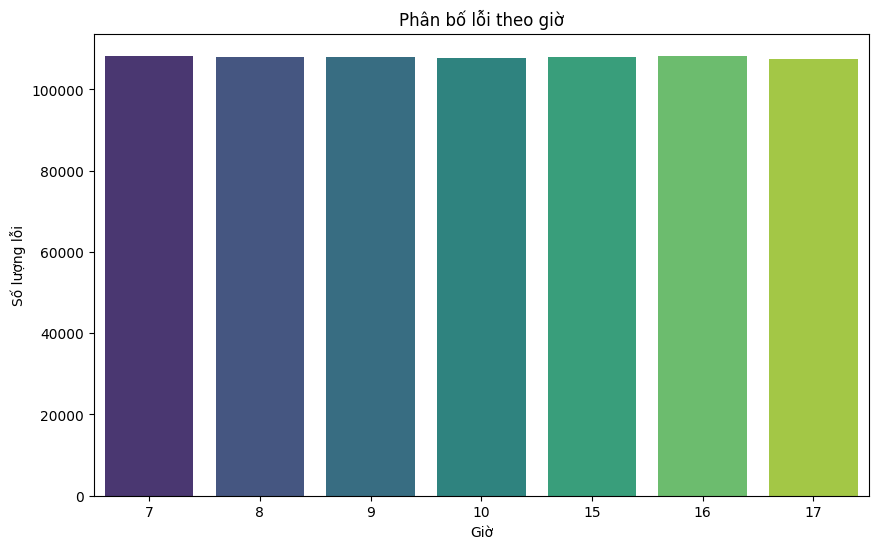

In [38]:
hourly_errors = df_filter['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_errors.index, y=hourly_errors.values, palette="viridis")
plt.title("Phân bố lỗi theo giờ")
plt.xlabel("Giờ")
plt.ylabel("Số lượng lỗi")
plt.show()

In [28]:
print (df_filter['day'].value_counts())

day
7     25485
15    25469
26    25386
2     25345
30    25331
27    25321
1     25297
3     25278
16    25267
23    25246
21    25242
24    25236
6     25230
18    25221
9     25219
11    25185
29    25167
10    25153
14    25151
17    25133
5     25127
4     25127
19    25072
13    25064
8     25058
25    25046
12    25029
22    25013
20    24990
28    24937
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_6420\435317948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_errors.index, y=day_errors.values, palette="viridis")


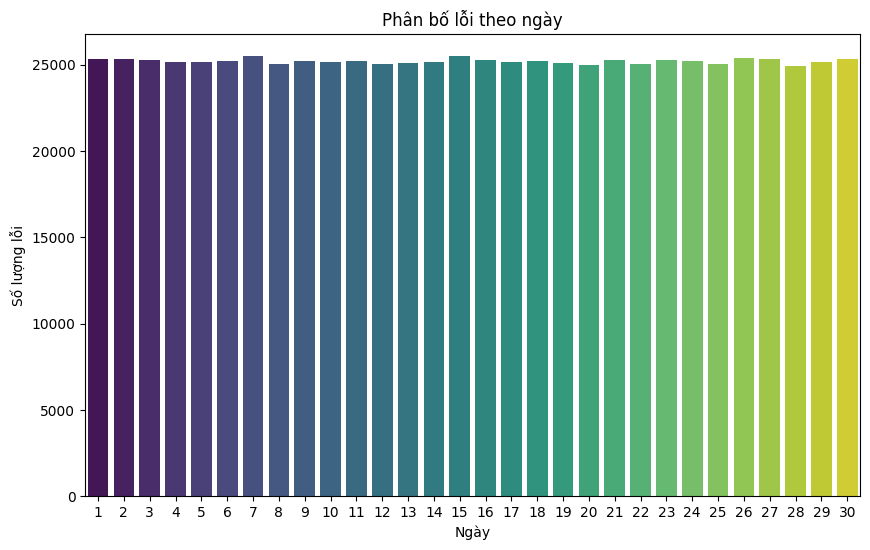

In [26]:
day_errors = df_filter['day'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=day_errors.index, y=day_errors.values, palette="viridis")
plt.title("Phân bố lỗi theo ngày")
plt.xlabel("Ngày")
plt.ylabel("Số lượng lỗi")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6420\4097034250.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filter, x='response_code', y='module_4_cpu', palette='coolwarm')


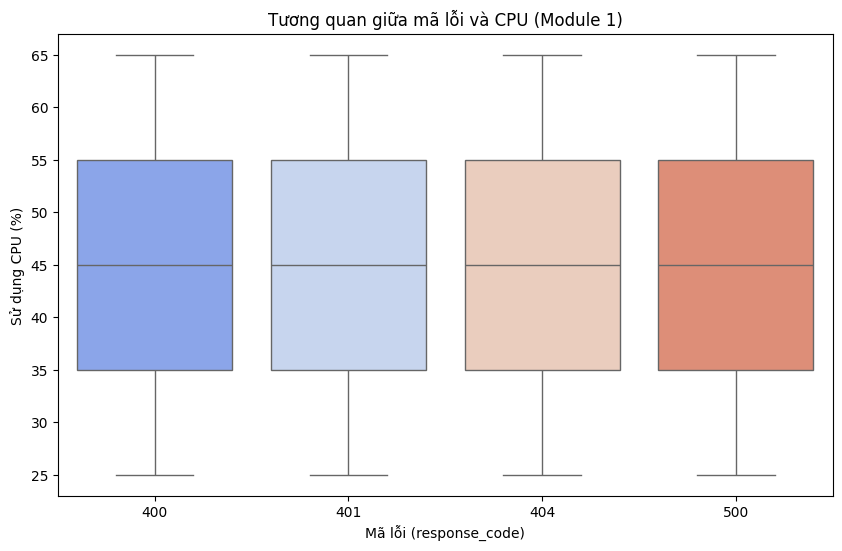

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filter, x='response_code', y='module_4_cpu', palette='coolwarm')
plt.title('Tương quan giữa mã lỗi và CPU (Module 1)')
plt.xlabel('Mã lỗi (response_code)')
plt.ylabel('Sử dụng CPU (%)')
plt.show()

In [49]:
hourly_errors.info()
hourly_errors = pd.DataFrame(hourly_errors)

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 7 to 17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   7 non-null      int64
dtypes: int64(1)
memory usage: 84.0 bytes


In [50]:
hourly_errors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 7 to 17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   7 non-null      int64
dtypes: int64(1)
memory usage: 84.0 bytes


In [51]:
cpu_usage = df_filter.groupby('hour')['cpu_total'].mean().reset_index()
cpu_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   hour       7 non-null      int32  
 1   cpu_total  7 non-null      float64
dtypes: float64(1), int32(1)
memory usage: 212.0 bytes


In [54]:
merged_data = hourly_errors.merge(cpu_usage, on='hour')


In [56]:
merged_data

,hour,count,cpu_total
0,7,108286,65.043034
1,8,108045,65.022333
2,9,108015,65.053261
3,10,107825,65.025115
4,15,107969,65.088544
5,16,108179,64.978711
6,17,107506,65.006409


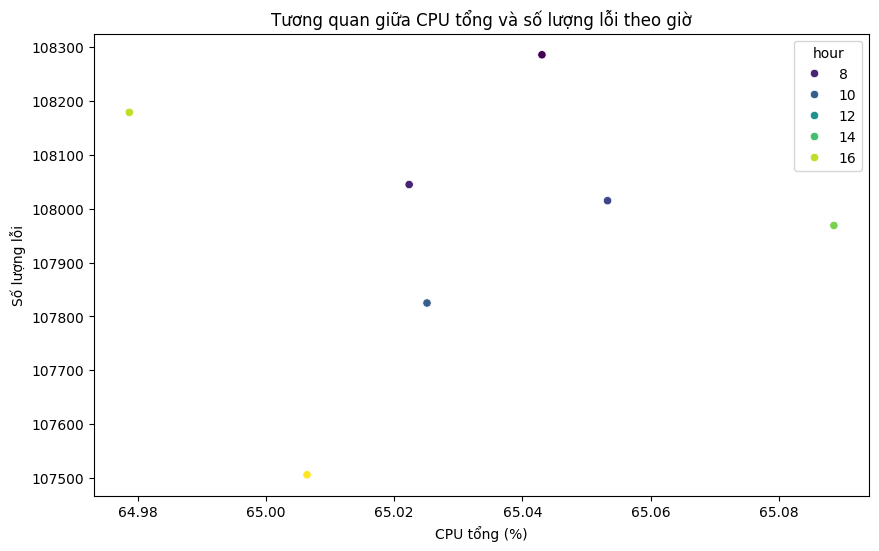

In [57]:
merged_data = hourly_errors.merge(cpu_usage, on='hour')
# Vẽ scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='cpu_total', y='count', hue='hour', palette='viridis')
plt.title('Tương quan giữa CPU tổng và số lượng lỗi theo giờ')
plt.xlabel('CPU tổng (%)')
plt.ylabel('Số lượng lỗi')
plt.show()